## Using Artificial Neural Network predict whether a customer is "Exited" or "Not" 

### Import Libraries

In [1]:
# !pip install tensorflow

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from tensorflow.keras import layers
from keras.callbacks import EarlyStopping


C:\New\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


### Import dataset

In [3]:
df=pd.read_csv(r"C:\Users\This Pc\Desktop\csv\DEEP Learning\DNN\Churn_Modelling.csv")

In [4]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [5]:
df.tail()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1
9999,10000,15628319,Walker,792,France,Female,28,4,130142.79,1,1,0,38190.78,0


### Data insights

In [6]:
df.shape

(10000, 14)

In [7]:
df.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [9]:
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [10]:
df.duplicated().sum()

0

In [11]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
RowNumber,10000.0,5.000500e+03,2886.895680,1.00,2500.75,5.000500e+03,7.500250e+03,10000.00
CustomerId,10000.0,1.569094e+07,71936.186123,15565701.00,15628528.25,1.569074e+07,1.575323e+07,15815690.00
CreditScore,10000.0,6.505288e+02,96.653299,350.00,584.00,6.520000e+02,7.180000e+02,850.00
Age,10000.0,3.892180e+01,10.487806,18.00,32.00,3.700000e+01,4.400000e+01,92.00
Tenure,10000.0,5.012800e+00,2.892174,0.00,3.00,5.000000e+00,7.000000e+00,10.00
Balance,10000.0,7.648589e+04,62397.405202,0.00,0.00,9.719854e+04,1.276442e+05,250898.09
NumOfProducts,10000.0,1.530200e+00,0.581654,1.00,1.00,1.000000e+00,2.000000e+00,4.00
HasCrCard,10000.0,7.055000e-01,0.455840,0.00,0.00,1.000000e+00,1.000000e+00,1.00
IsActiveMember,10000.0,5.151000e-01,0.499797,0.00,0.00,1.000000e+00,1.000000e+00,1.00
EstimatedSalary,10000.0,1.000902e+05,57510.492818,11.58,51002.11,1.001939e+05,1.493882e+05,199992.48


In [12]:
df.Geography.unique()

array(['France', 'Spain', 'Germany'], dtype=object)

In [13]:
df.Gender.value_counts()

Male      5457
Female    4543
Name: Gender, dtype: int64

In [14]:
df.Exited.value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

In [15]:
df.NumOfProducts.value_counts()

1    5084
2    4590
3     266
4      60
Name: NumOfProducts, dtype: int64

In [16]:
df1=df.copy()

In [17]:
df1.drop(['RowNumber','CustomerId','Surname'],axis=1,inplace=True)

In [18]:
for i in df1.columns:
    print("*****************************",i,"*****************************")
    print()
    print(set(df1[i].tolist()))

***************************** CreditScore *****************************

{350, 351, 358, 359, 363, 365, 367, 373, 376, 382, 383, 386, 395, 399, 401, 404, 405, 407, 408, 410, 411, 412, 413, 414, 415, 416, 417, 418, 419, 420, 421, 422, 423, 424, 425, 426, 427, 428, 429, 430, 431, 432, 433, 434, 435, 436, 437, 438, 439, 440, 441, 442, 443, 444, 445, 446, 447, 448, 449, 450, 451, 452, 453, 454, 455, 456, 457, 458, 459, 460, 461, 462, 463, 464, 465, 466, 467, 468, 469, 470, 471, 472, 473, 474, 475, 476, 477, 478, 479, 480, 481, 482, 483, 484, 485, 486, 487, 488, 489, 490, 491, 492, 493, 494, 495, 496, 497, 498, 499, 500, 501, 502, 503, 504, 505, 506, 507, 508, 509, 510, 511, 512, 513, 514, 515, 516, 517, 518, 519, 520, 521, 522, 523, 524, 525, 526, 527, 528, 529, 530, 531, 532, 533, 534, 535, 536, 537, 538, 539, 540, 541, 542, 543, 544, 545, 546, 547, 548, 549, 550, 551, 552, 553, 554, 555, 556, 557, 558, 559, 560, 561, 562, 563, 564, 565, 566, 567, 568, 569, 570, 571, 572, 573, 574, 575, 5

In [19]:
df1.head(10)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
5,645,Spain,Male,44,8,113755.78,2,1,0,149756.71,1
6,822,France,Male,50,7,0.00,2,1,1,10062.80,0
7,376,Germany,Female,29,4,115046.74,4,1,0,119346.88,1
8,501,France,Male,44,4,142051.07,2,0,1,74940.50,0
9,684,France,Male,27,2,134603.88,1,1,1,71725.73,0


In [20]:
df1=pd.get_dummies(df1,columns=['Geography'],drop_first=True)

### Label Encoder 

In [21]:
df1['Gender'] = df1['Gender'].astype('category')
df1['Gender'] = df1['Gender'].cat.codes

In [22]:
df1.shape

(10000, 12)

In [23]:
df1.columns

Index(['CreditScore', 'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts',
       'HasCrCard', 'IsActiveMember', 'EstimatedSalary', 'Exited',
       'Geography_Germany', 'Geography_Spain'],
      dtype='object')

In [24]:
df1.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain
0,619,0,42,2,0.00,1,1,1,101348.88,1,0,0
1,608,0,41,1,83807.86,1,0,1,112542.58,0,0,1
2,502,0,42,8,159660.80,3,1,0,113931.57,1,0,0
3,699,0,39,1,0.00,2,0,0,93826.63,0,0,0
4,850,0,43,2,125510.82,1,1,1,79084.10,0,0,1


In [25]:
X=df1.drop("Exited",axis=1)
y=df1['Exited']

In [26]:
X

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain
0,619,0,42,2,0.00,1,1,1,101348.88,0,0
1,608,0,41,1,83807.86,1,0,1,112542.58,0,1
2,502,0,42,8,159660.80,3,1,0,113931.57,0,0
3,699,0,39,1,0.00,2,0,0,93826.63,0,0
4,850,0,43,2,125510.82,1,1,1,79084.10,0,1
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,1,39,5,0.00,2,1,0,96270.64,0,0
9996,516,1,35,10,57369.61,1,1,1,101699.77,0,0
9997,709,0,36,7,0.00,1,0,1,42085.58,0,0
9998,772,1,42,3,75075.31,2,1,0,92888.52,1,0


In [27]:
X.shape

(10000, 11)

In [28]:
y.shape

(10000,)

### Split data into train and test

In [29]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [30]:
X_train.shape

(8000, 11)

In [31]:
X_test.shape

(2000, 11)

### Data Normalisation

In [32]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [33]:
X_train

array([[ 0.16958176, -1.09168714, -0.46460796, ...,  1.10643166,
        -0.5698444 ,  1.74309049],
       [-2.30455945,  0.91601335,  0.30102557, ..., -0.74866447,
         1.75486502, -0.57369368],
       [-1.19119591, -1.09168714, -0.94312892, ...,  1.48533467,
        -0.5698444 , -0.57369368],
       ...,
       [ 0.9015152 ,  0.91601335, -0.36890377, ...,  1.41231994,
        -0.5698444 , -0.57369368],
       [-0.62420521, -1.09168714, -0.08179119, ...,  0.84432121,
        -0.5698444 ,  1.74309049],
       [-0.28401079, -1.09168714,  0.87525072, ...,  0.32472465,
         1.75486502, -0.57369368]])

### Model Building

In [34]:
model=Sequential()
model.add(Dense(26,activation="relu",input_dim=11))
model.add(Dense(10,activation="relu"))
model.add(Dropout(.25))
model.add(Dense(1,activation="sigmoid"))


In [35]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 26)                312       
                                                                 
 dense_1 (Dense)             (None, 10)                270       
                                                                 
 dropout (Dropout)           (None, 10)                0         
                                                                 
 dense_2 (Dense)             (None, 1)                 11        
                                                                 
Total params: 593
Trainable params: 593
Non-trainable params: 0
_________________________________________________________________


In [36]:
model.compile(optimizer="adam",loss="binary_crossentropy",metrics=["accuracy"])

In [37]:
history=model.fit(X_train, y_train, validation_data=(X_test, y_test),epochs=100)

Epoch 1/100
250/250 [==============================] - 5s 3ms/step - loss: 0.5571 - accuracy: 0.7414 - val_loss: 0.4490 - val_accuracy: 0.7985
Epoch 2/100
250/250 [==============================] - 1s 2ms/step - loss: 0.4608 - accuracy: 0.7994 - val_loss: 0.4215 - val_accuracy: 0.8225
Epoch 3/100
250/250 [==============================] - 1s 2ms/step - loss: 0.4419 - accuracy: 0.8108 - val_loss: 0.4128 - val_accuracy: 0.8285
Epoch 4/100
250/250 [==============================] - 0s 2ms/step - loss: 0.4258 - accuracy: 0.8189 - val_loss: 0.4065 - val_accuracy: 0.8295
Epoch 5/100
250/250 [==============================] - 0s 2ms/step - loss: 0.4215 - accuracy: 0.8211 - val_loss: 0.3976 - val_accuracy: 0.8400
Epoch 6/100
250/250 [==============================] - 1s 2ms/step - loss: 0.4084 - accuracy: 0.8292 - val_loss: 0.3880 - val_accuracy: 0.8345
Epoch 7/100
250/250 [==============================] - 0s 2ms/step - loss: 0.4007 - accuracy: 0.8263 - val_loss: 0.3798 - val_accuracy: 0.8370

### Plotting of train and test accuracy 

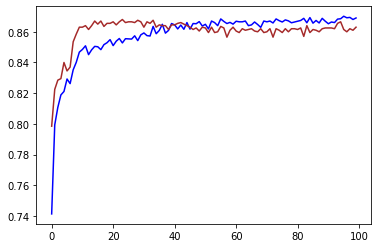

In [38]:
plt.plot(history.history['accuracy'],color="blue")
plt.plot(history.history['val_accuracy'],color="brown")

### Plotting train and test loss 

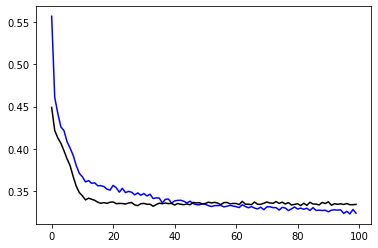

In [39]:
plt.plot(history.history['loss'],color="blue")
plt.plot(history.history['val_loss'],color="black")

### Prediction

In [40]:
y_pred=model.predict(X_test)
y_pred=(y_pred>.5)
y_pred

63/63 [==============================] - 0s 2ms/step


array([[False],
       [False],
       [False],
       ...,
       [False],
       [False],
       [False]])

In [41]:
y_pred_lis=[]
for i in y_pred:
    if i>=.5:
        y_pred_lis.append(1)
    else:
        y_pred_lis.append(0)
# print(y_pred_lis)        

In [42]:
data={'Original_ churn':y_test,'Pred_churn':y_pred_lis}
df_check=pd.DataFrame(data)
df_check.head(10)

,Original_ churn,Pred_churn
9394,0,0
898,1,0
2398,0,0
5906,0,0
2343,0,0
8225,1,1
5506,0,0
6451,0,0
2670,1,0
3497,1,1


### Calculating Classification report,Confusion matrics and accuracy

In [43]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,roc_curve

In [44]:
print(confusion_matrix(y_test,y_pred))

[[1534   61]
 [ 213  192]]


In [45]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.88      0.96      0.92      1595
           1       0.76      0.47      0.58       405

    accuracy                           0.86      2000
   macro avg       0.82      0.72      0.75      2000
weighted avg       0.85      0.86      0.85      2000



In [46]:
print(accuracy_score(y_test,y_pred))

0.863


### Calculating Roc-Auc curve

In [47]:
from sklearn.metrics import roc_auc_score
model_roc_auc = roc_auc_score(y_test, y_pred)
model_roc_auc

0.7179147799837455

In [48]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred)

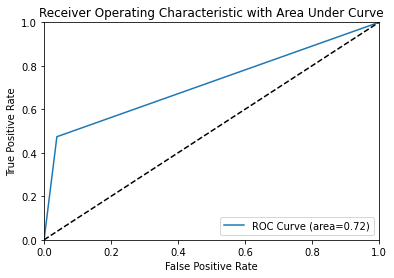

In [49]:
plt.figure()
plt.plot(fpr, tpr, label = "ROC Curve (area=%0.2f)" %model_roc_auc)
plt.plot([0,1],[0,1],'k--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.0])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic with Area Under Curve")
plt.legend(loc='lower right')
plt.show()

In [54]:
new_prediction = model.predict(sc.transform(np.array([[0.0, 0, 600, 1, 40, 3, 60000, 4, 1, 0, 50000]])))
new_prediction = (new_prediction > 0.5)

1/1 [==============================] - 0s 23ms/step


C:\New\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [55]:
print(new_prediction)

[[False]]
